In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载预处理后的N-gram特征数据
input_file_path = '/Users/jiaoyihan/capstone/capstone_project/combined_emails_ngram.csv'
data = pd.read_csv(input_file_path)

# 打印列名以检查标签列的名称
print("data columns:", data.columns)


data columns: Index(['able', 'access', 'account', 'account will', 'accounts', 'action',
       'action required', 'active', 'activity', 'address',
       ...
       'version content', 'version content type', 'vince', 'vince kaminski',
       'wed', 'wednesday', 'white', 'william', 'williams', 'york'],
      dtype='object', length=863)


In [5]:
import pandas as pd

# 加载数据集
phishing_file_path = '/Users/jiaoyihan/capstone/capstone_project/Processed_CaptstoneProjectData_2024_ngram.csv'
normal_file_path = '/Users/jiaoyihan/capstone/capstone_project/emails.csv'

phishing_data = pd.read_csv(phishing_file_path)
normal_data = pd.read_csv(normal_file_path)

# 打印列名以检查
print("Phishing data columns:", phishing_data.columns)
print("Normal data columns:", normal_data.columns)


Phishing data columns: Index(['able', 'access', 'account', 'account will', 'accounts', 'action',
       'action required', 'active', 'activity', 'address',
       ...
       'wish', 'within', 'within hours', 'without', 'work', 'working', 'world',
       'year', 'years', 'zip'],
      dtype='object', length=500)
Normal data columns: Index(['file', 'message'], dtype='object')


数据集的列名: Index(['able', 'access', 'account', 'account will', 'accounts', 'action',
       'action required', 'active', 'activity', 'address',
       ...
       'version content', 'version content type', 'vince', 'vince kaminski',
       'wed', 'wednesday', 'white', 'william', 'williams', 'york'],
      dtype='object', length=863)
准确率: 1.0
分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103447
           1       1.00      1.00      1.00       549

    accuracy                           1.00    103996
   macro avg       1.00      1.00      1.00    103996
weighted avg       1.00      1.00      1.00    103996



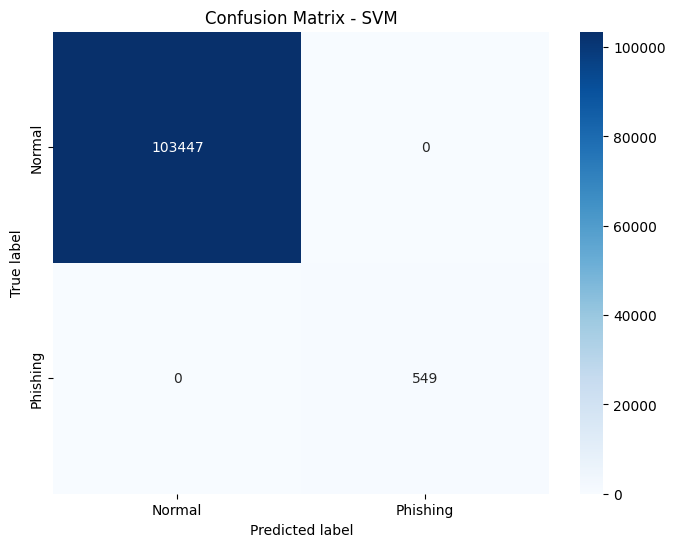

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
file_path = '/Users/jiaoyihan/capstone/capstone_project/Combined_emails_ngram.csv'
data = pd.read_csv(file_path)

# 打印列名以检查标签列的名称
print("数据集的列名:", data.columns)

# 填充缺失值（这里使用0进行填充，也可以使用其他策略）
data = data.fillna(0)

# 确认标签列名，假设标签列名为 'label'
label_column = 'label'

# 检查标签列是否存在
if label_column not in data.columns:
    raise KeyError(f"数据集中不包含名为'{label_column}'的列。")

# 分割特征和标签
X = data.drop(label_column, axis=1)
y = data[label_column]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化SVM模型
model = SVC(kernel='linear', random_state=42)

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred))

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Phishing'], yticklabels=['Normal', 'Phishing'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - SVM')
plt.show()
